# Perkenalan 
Nama : Fadhilah  
Batch : HCK-013  

**Objective** : Projek ini dibuat untuk mengetahui konsep Machine learning dengan model Regression menggunakan KNN Regression, SVR, Decision Tree Regression, Random Forest Regression, dan XGBoost Regression untuk memprediksi fitur - fitur apa saja yang mempengaruhi target dalam peningkatkan harga sewa rumah/apartment/rusun dengan memilih salah satu model regression, kemudian melakukan hyperparameter tuning pada model regression.

## Import Libraries

In [2]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, spearmanr
from sklearn.metrics import make_scorer, r2_score


# Libraries for saving
import pickle
import json


## Data Loading

In [4]:
# Load Dataset
data = pd.read_csv('House_Rent_Dataset.csv')
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


Data Successfully Loaded

In [1498]:
data.tail(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4736,2022-06-28,3,15000,1500,Lower Basement out of 2,Super Area,Almasguda,Hyderabad,Semi-Furnished,Family,3,Contact Owner
4737,2022-07-07,3,15000,1500,Lower Basement out of 2,Super Area,Almasguda,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4738,2022-07-06,2,17000,855,4 out of 5,Carpet Area,"Godavari Homes, Quthbullapur",Hyderabad,Unfurnished,Bachelors,2,Contact Agent
4739,2022-07-06,2,25000,1040,2 out of 4,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner
4740,2022-06-02,2,12000,1350,2 out of 2,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [1499]:
# Check info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


**Insight**
- Rows : `4746`
- Columns : `12`
- Dtypes : `int64(4) and object(8)`                                   

Notes : Berdasarkan pengamatan, kolom `Posted On` merupakan kolom tanggal kapan terbitnya iklan dari tawaran sewa rumah/apartment/rusun tersebut. Sehingga, by personal judgment iklan kapan terbitnya tawaran sewa tidak ada mempengaruhi harga sewa rumah/apartment/rusun. Oleh karena itu, diperlukannya drop kolom `Posted On` 

In [1500]:
# Drop column 'Posted On' 
data.drop(['Posted On'], axis=1, inplace=True)

In [1501]:
# Check Duplicated data
data.duplicated().sum()

8

In [1502]:
# Drop Duplicated data
data.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

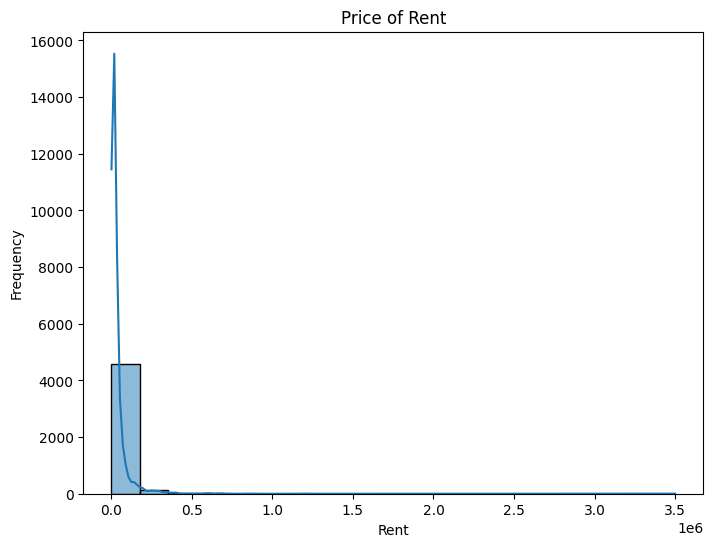

In [1503]:
# Histogram untuk melihat distribusi harga sewa
plt.figure(figsize=(8, 6))
sns.histplot(data['Rent'], bins=20, kde=True,)
plt.title('Price of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

**Insight** : Dari histogram, kita bisa melihat bahwa distribusi harga sewa cenderung condong ke kanan (right-skewed) atau positif skewed, dengan mayoritas sewa memiliki harga di sekitar nilai rendah. Ini menunjukkan bahwa sebagian besar penyewaan memiliki harga yang relatif rendah. Kita juga bisa berasumsi bahwa distribusi harga sewa memiliki outlier dan faktor yang mempengaruhi distribusi harga sewa itu sendiri. 

Text(0.5, 1.0, 'Furnishing Status vs Rent')

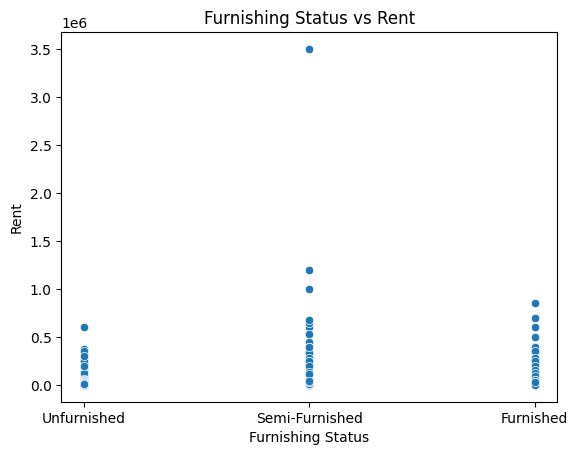

In [1504]:
#Scatterplot between Furnishing Status and Rent

sns.scatterplot(data=data,x='Furnishing Status', y='Rent')
plt.title('Furnishing Status vs Rent')

**Insight** : Diketahui bahwa harga sewa tertinggi terdapat pada semi-furnished, akan tetapi bukan berarti semi-furnished lebih mahal dari furnished, karena masih banyak variabel dari furnishing status yang mempengaruhi harga sewa, Dengan melihatnya plot paling teratas dapat disimpulkan harga sewa memiliki outlier 

Text(0.5, 1.0, 'Size vs Rent')

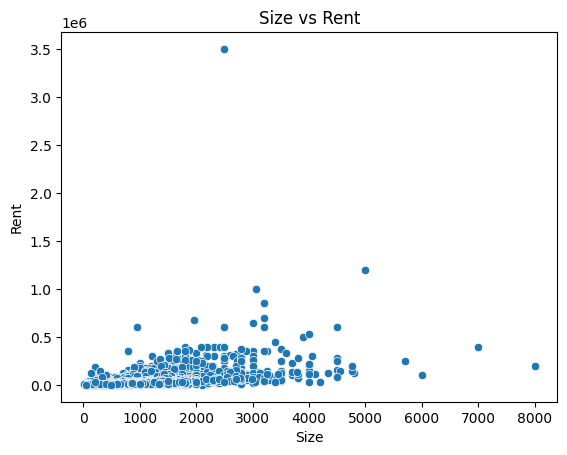

In [1505]:
#Scatterplot between Size and Rent

sns.scatterplot(data=data,x='Size', y='Rent')
plt.title('Size vs Rent')

**Insight** : Diketahui bahwa size mempengaruhi harga sewa, harga sewa dominan terletak pada harga yang relatif rendah. Akantetapi, dikarenakan tidak size saja yang mempengaruhi harga sewa maka harga tertinggi tidak terdapat pada size yang tinggi juga 

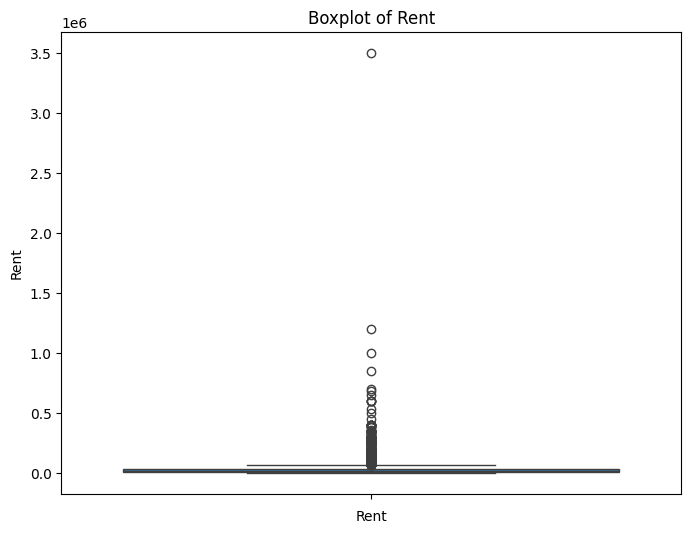

In [1506]:
# Box plot untuk melihat adanya outlier
plt.figure(figsize=(8, 6))
sns.boxplot(data['Rent'])
plt.title('Boxplot of Rent')
plt.xlabel('Rent')
plt.show()

**Insight**                            
Outlier: Dari box plot, kita bisa melihat adanya beberapa outlier di bagian atas tanduk atau distribusi harga sewa. Outlier ini menunjukkan adanya beberapa perjalanan yang memiliki harga tinggi dan satu harga sewa jauh lebih tinggi dari mayoritas harga sewa lainnya.

In [1507]:
Area_Type_freq = data['Area Type'].value_counts()
Area_Type_freq

Area Type
Super Area     2445
Carpet Area    2291
Built Area        2
Name: count, dtype: int64

<Axes: xlabel='Area Type'>

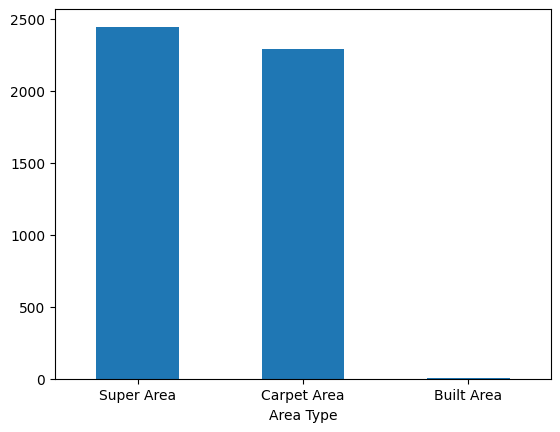

In [1508]:
Area_Type_freq.plot(kind='bar', rot=0)

**Insight** : Diketahui tipe area memiliki 3 area yang berbeda yaitu Super Area, Carpet Area, dan Built Area. Salah satu tipe area yaitu built area didefinisikan sebagai outlier karena hanya memiliki jumlah value 2 dibandingkan area lainnya dan memberikan interpretasi yang buruk. Sehingga diberi Action dengan melakukan drop value built area.

In [1509]:
# Drop rows where the value in the 'Area Type' column is 'Built Area'
data.drop(data[data['Area Type'] == 'Built Area'].index, inplace=True)

## Feature Engineering

### Handling Cardinality

In [1510]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(data.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, data[col].nunique(), data[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Floor,480,"[Ground out of 2, 1 out of 3, 1 out of 2, Ground out of 1, Ground out of 4, 1 out of 4, 1 out of 1, Ground out of 3, 2 out of 3, 4 out of 5, 2 out of 2, 2 out of 5, 4 out of 14, 3 out of 3, 5 out of 5, 4 out of 4, 7 out of 8, 2 out of 4, 3 out of 4, 1 out of 5, 8 out of 5, Ground out of 6, 2 out of 1, Upper Basement out of 4, Ground out of 5, 3 out of 5, 11 out of 19, 5 out of 10, 11 out of 14, Lower Basement out of 2, 2 out of 7, 4 out of 10, 7 out of 10, 2 out of 13, 6 out of 7, 4 out of 7, 14 out of 14, 43 out of 78, 2 out of 8, 13 out of 18, 5 out of 12, 18 out of 24, 3 out of 7, 17 out of 31, 11 out of 21, 7 out of 19, 14 out of 23, 9 out of 20, Upper Basement out of 9, 19 out of 24, 3 out of 21, 1 out of 22, 8 out of 8, 6 out of 12, 4 out of 58, Upper Basement out of 16, 60 out of 66, 34 out of 48, 5 out of 8, 5 out of 14, 14 out of 40, 5 out of 7, 9 out of 22, 12 out of 18, 26 out of 44, 1 out of 8, 25 out of 42, 25 out of 41, 53 out of 78, Ground out of 7, 14 out of 20, 13 out of 20, 16 out of 23, 10 out of 18, 39 out of 60, 16 out of 21, 10 out of 32, 4 out of 8, 12 out of 24, 32 out of 41, 3 out of 30, 13 out of 21, 9 out of 29, 47 out of 89, 7 out of 41, 28 out of 30, 13 out of 15, 6 out of 21, 8 out of 16, 2 out of 6, 5 out of 19, 3 out of 11, 17 out of 42, 10 out of 12, 8 out of 28, 9 out of 15, 14 out of 22, 18 out of 40, 9 out of 17, 12 out of 45, ...]"
1,Area Type,2,"[Super Area, Carpet Area]"
2,Area Locality,2234,"[Bandel, Phool Bagan, Kankurgachi, Salt Lake City Sector 2, Dumdum Park, South Dum Dum, Thakurpukur, Malancha, Palm Avenue Kolkata, Ballygunge, Natunhat, Action Area 1, Rajarhat Newtown, Keshtopur, Tarulia, Keshtopur, Dum Dum Metro, Paschim Barisha, New Town Action Area 1, Barasat, Behala, Behala Chowrasta, Santoshpur, Garia Station, Garia, Joka, Sreebhumi, Rajarhat, Dum Dum, Kodalia, Hooghly-Chinsurah, Baguiati, Rabindra Sarobar Area, Dhakuria, Baghajatin, Project Kaikhali, Vip Road, Vip Road, Baruipur, Shyam Bazar, Birati, Bansdroni, Jadavpur University, Bhadrakali, Ballygunge, Kalikapur, Baishnabghata Patuli Township, Patuli, Salt Lake City, New Town, Pancha Sayar, Hooghly-Chinsurah, Amtala, Diamond Harbour Road, Shrachi Village, Madhyam Gram, Kasba, VIP Road Haldiram, Sarsuna, Naihati, Baksara, Chak Thakurani, Thakurpukur, Jadavpur, Salt Lake City Sector 1, Beliaghata, Magnolia Prestige, Rajarhat, Dum Dum Heights, Jessore Road, Sonarpur, Lake Town, Belghoria, Rabindra Pally, Keshtopur, shukhobrishti, Baishnavghata patuli , house number s-300 Kolkata 700094, Hazra, Kalighat, Ajoy Nagar, Kasba -East, New Garia, Garia, Anandapur, Boral, Bagbazar, Salt Lake City Sector 3, Avenue S, Santoshpur, Pratiraksha Nagar, Kudghat, Ashok Nagar, Sakher Bazar, Purba Barisha, Purbasan, Thakurpukur, Bidhan Pally, Bansdroni, Naktala, Garia, Tiljala Road, Sankaritola, Parnashree Lake, Behala, Garia, Dakshineswar, chatana, Mukundapur, Salt Lake City Sector 5, Entally, Kaikhali, Dash Drone, Rajarhat Newtown, Rajdanga Gardens, Kasba, South Baksara, Chandannagar, Hooghly-Chinsurah, Sukhpally, Haltu, Garia Dhalua Nabapally, Chinar Park, Rajarhat, Konnagar, Behala silpara, New Barrakpur, Thakurpukur, Kolkata, Hindmotor, Howrah, ...]"
3,City,6,"[Kolkata, Mumbai, Bangalore, Delhi, Chennai, Hyderabad]"
4,Furnishing Status,3,"[Unfurnished, Semi-Furnished, Furnished]"
5,Tenant Preferred,3,"[Bachelors/Family, Bachelors, Family]"
6,Point of Contact,3,"[Contact Owner, Contact Agent, Contact Builder]"


**Insight** : Kolom `Floor` dan `Area Locality` memiliki high cardinality, sehingga dilakukannya modifikasi terhadap kolom high cardinality

In [6]:
# Melakukan perubahan pada kolom 'Floor'
data['Floor'] = data['Floor'].str.split(' ').str[0]
data['Floor'] = data['Floor'].str.replace('Ground', '1')
data['Floor'] = data['Floor'].str.replace('Upper Basement', '-1')
data['Floor'] = data['Floor'].str.replace('Lower Basement', '-2')
data['Floor'] = data['Floor'].str.replace('Upper', '2')
data['Floor'] = data['Floor'].str.replace('Lower', '1')
data['Floor'] = data['Floor'].astype(int)

Kolom `Floor` diketahui memiliki dependensi terhadap harga sewa sehingga tidak dapat melakukan drop kolom dan dilakukannya modifikasi terhadap valuenya 

### Splitting between Train-Set and Test-Set

In [1512]:
#Splitting between 'X' and 'y'

X = data.drop(['Rent'], axis = 1)
y = data['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (3788, 10)
Test Size:  (948, 10)


### Handling Outlier

In [1513]:
num_cols = list(X_train.select_dtypes(exclude=['object', 'datetime64[ns]']).columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,BHK,0.618861
1,Size,2.296373
2,Floor,4.988326
3,Bathroom,1.307860


**Insight** : Melakukan pengecekan nilai skewness pada kolom numerical dan ditemukan semua kolom numerikal bersifat skew atau tidak terdistribusi normal

In [1514]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

BHK - Before Capping


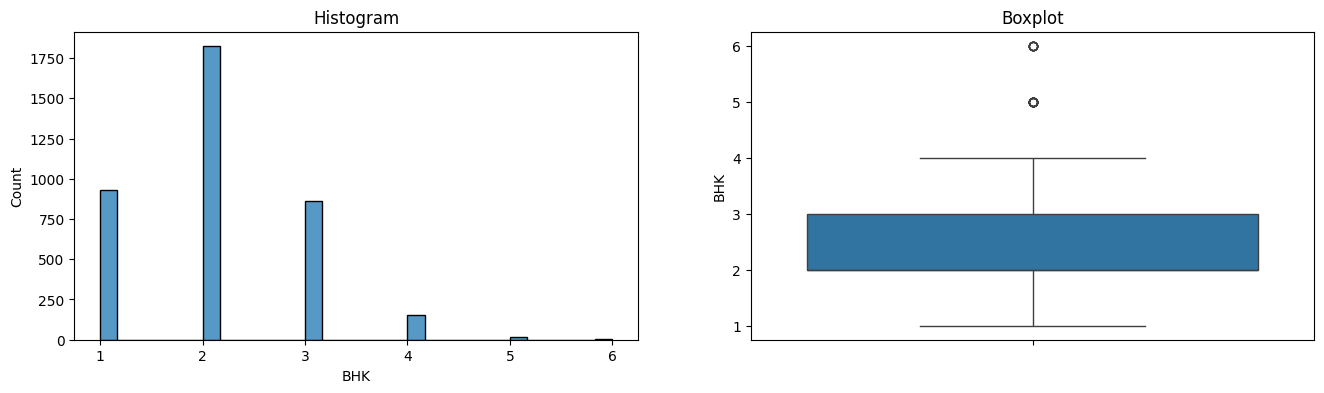

Size - Before Capping


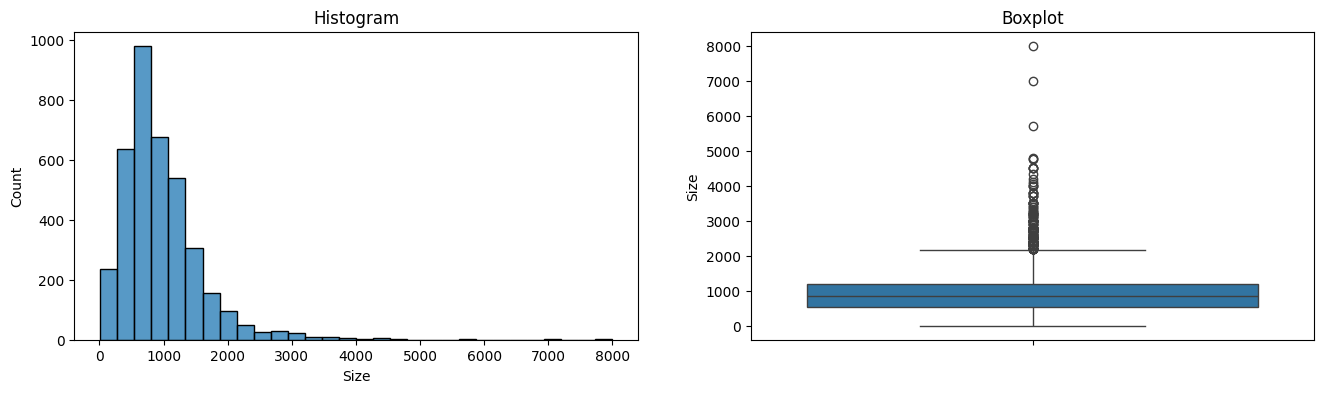

Floor - Before Capping


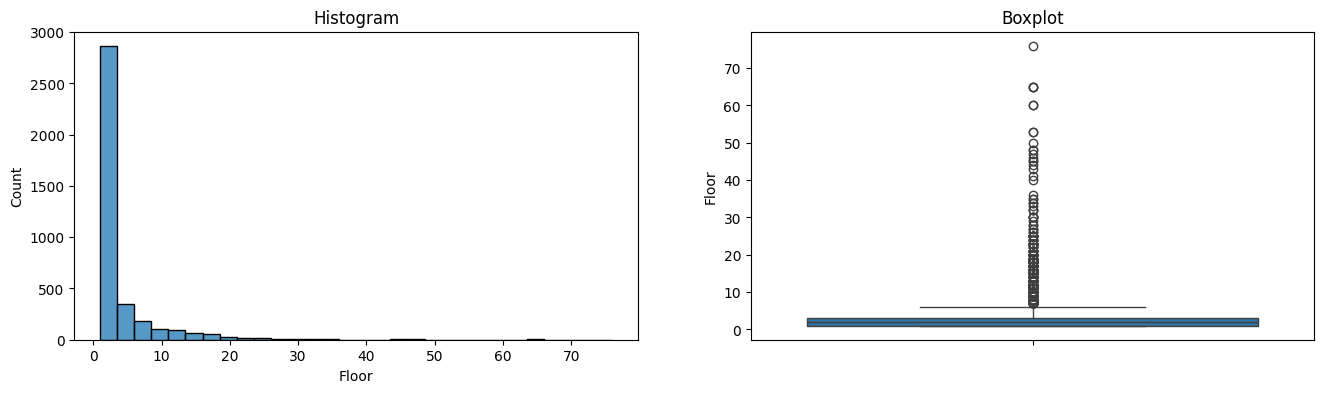

Bathroom - Before Capping


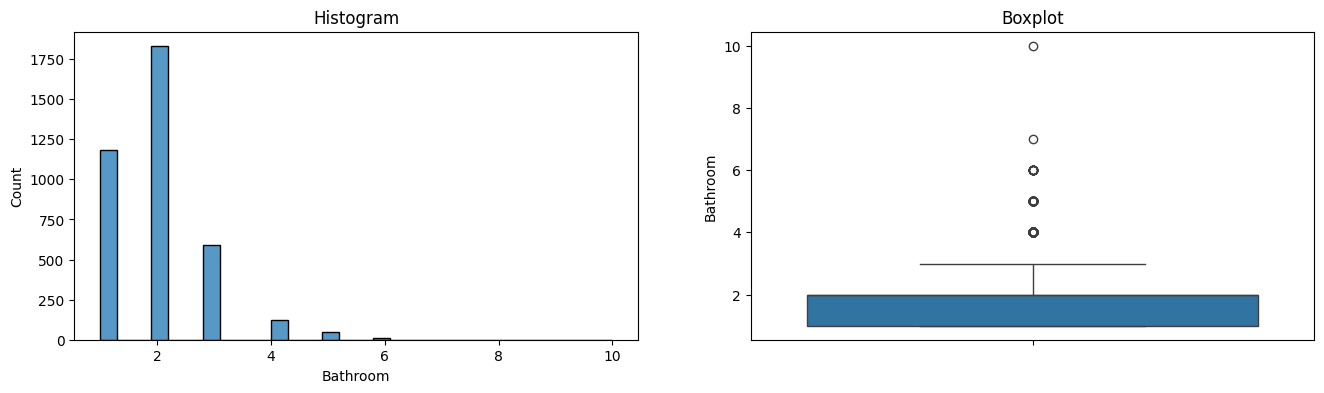

In [1515]:
# Check the distribution before capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

In [1516]:
# Capping the skew distribution 

winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=['BHK', 'Size', 'Floor', 'Bathroom']
                            )

X_train_capped = winsoriser.fit_transform(X_train)
X_test_capped = winsoriser.transform(X_test)


BHK - After Capping


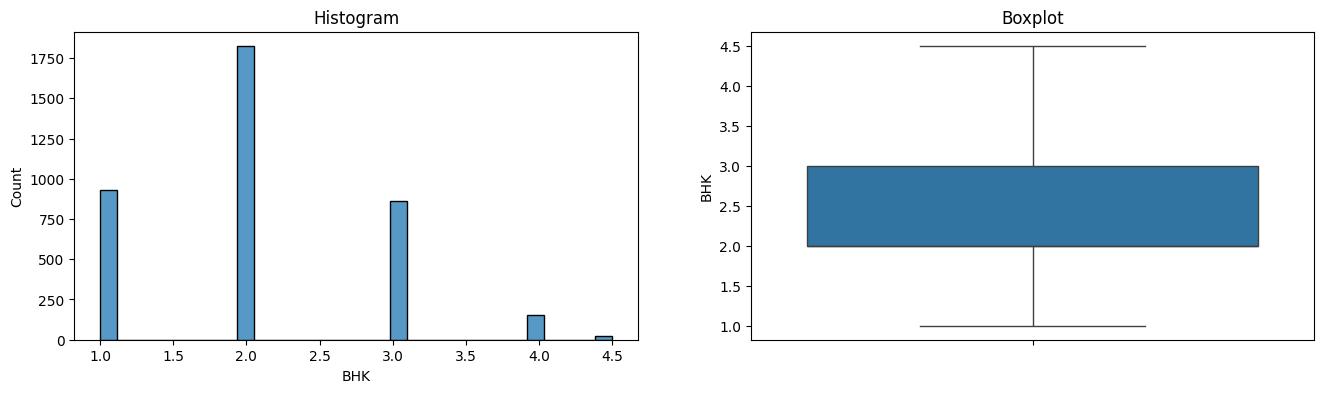


Size - After Capping


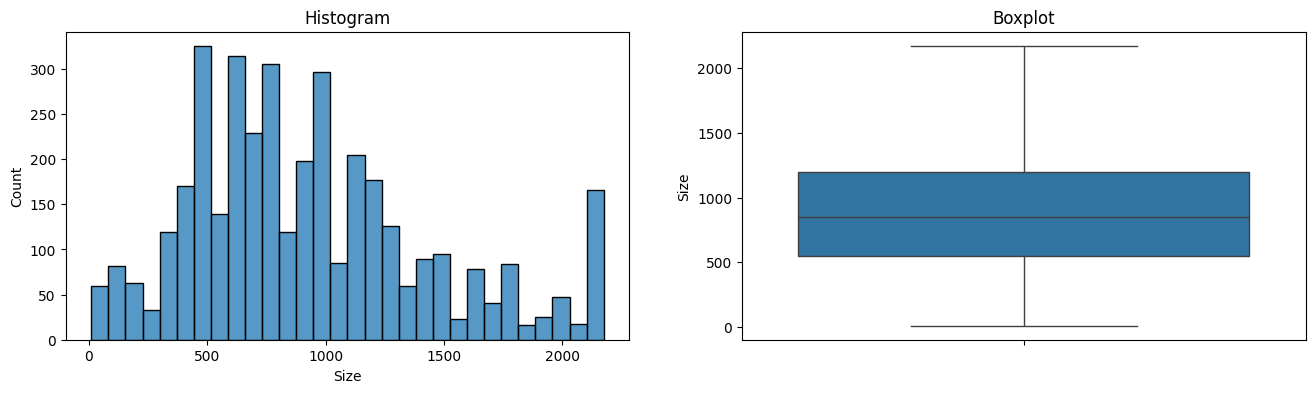


Floor - After Capping


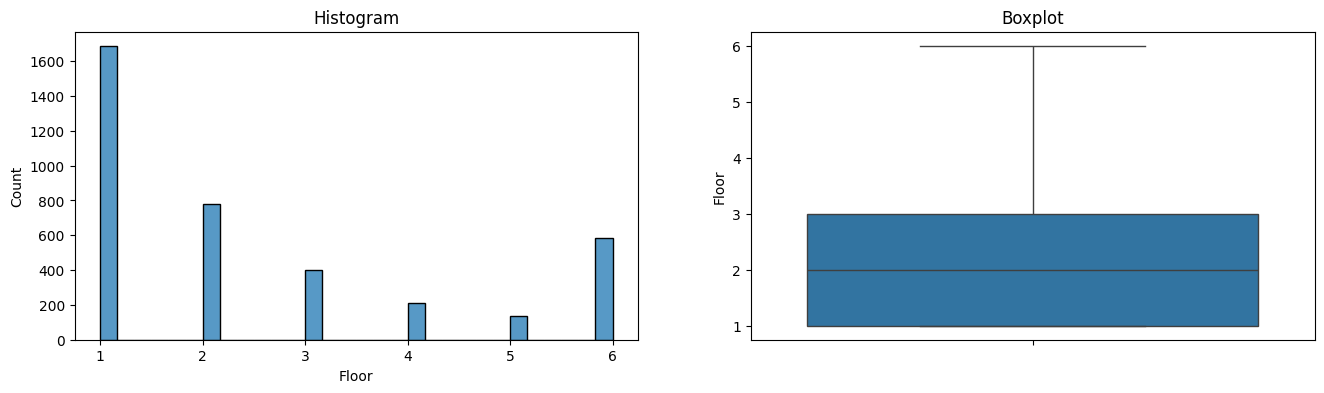


Bathroom - After Capping


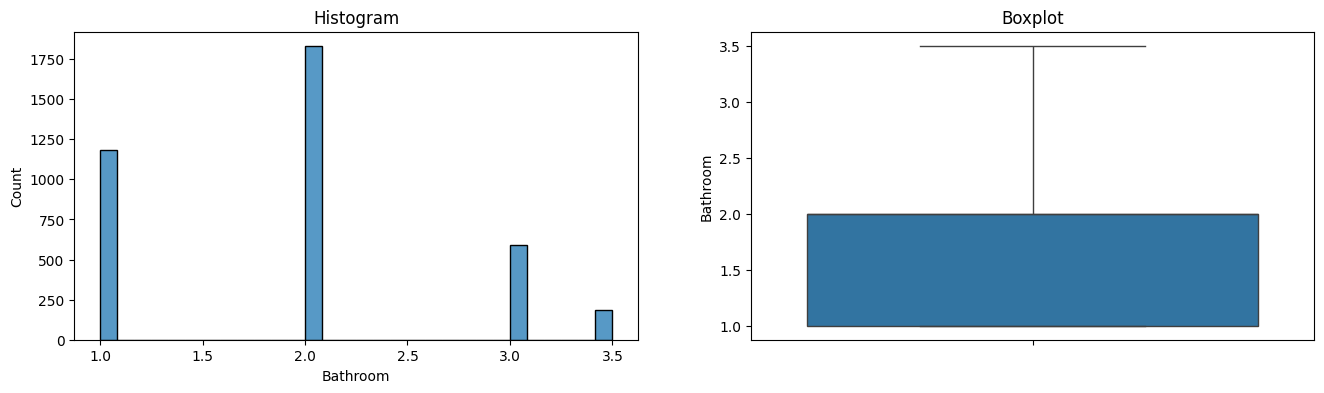

In [1517]:
# Check the distribution after capping
for col in num_cols:
  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

### Handling Missing Value 

In [1518]:
X_train.isnull().sum()

BHK                  0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [1519]:
X_test.isnull().sum()

BHK                  0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [1520]:
y_train.isnull().sum()

0

In [1521]:
y_test.isnull().sum()

0

Tidak terdapat missing value, sehingga tidak diperlukannya action pada handling missing value

### Feature Selection

In [1522]:
X_train

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2506,3,75,4,Super Area,Sagar Pur,Delhi,Unfurnished,Bachelors/Family,1,Contact Owner
1715,1,600,1,Carpet Area,"Banashankari Stage 3, Banashankari",Bangalore,Unfurnished,Bachelors,1,Contact Owner
236,2,839,1,Super Area,Howrah,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner
166,3,700,1,Carpet Area,"Halisahar Station Road, Kanchrapara",Kolkata,Unfurnished,Family,2,Contact Owner
2677,2,900,3,Carpet Area,"Jagriti Enclave, Anand Vihar",Delhi,Semi-Furnished,Bachelors,2,Contact Agent
...,...,...,...,...,...,...,...,...,...,...
3612,1,400,1,Super Area,"Perungalathur, Chennai Bypass Road",Chennai,Semi-Furnished,Bachelors/Family,2,Contact Owner
4732,2,900,1,Super Area,Vinayaka Nagar,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner
3349,3,1600,15,Carpet Area,Iyyappanthangal,Chennai,Semi-Furnished,Bachelors/Family,3,Contact Agent
3072,2,800,1,Super Area,Perungudi,Chennai,Unfurnished,Bachelors/Family,1,Contact Owner


### Split Between Numeric columns and Categorical columns

In [1523]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['BHK', 'Size', 'Floor', 'Bathroom']
Categorical Columns:  ['Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']


In [1524]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,BHK,Size,Floor,Bathroom
2506,3,75,4,1
1715,1,600,1,1
236,2,839,1,2
166,3,700,1,2
2677,2,900,3,2
...,...,...,...,...
3612,1,400,1,2
4732,2,900,1,1
3349,3,1600,15,3
3072,2,800,1,1


### Feature Selection

In [1525]:
# Feature selection Categorical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Area Type,ada korelasi
1,Area Locality,ga ada korelasi
2,City,ada korelasi
3,Furnishing Status,ada korelasi
4,Tenant Preferred,ga ada korelasi
5,Point of Contact,ada korelasi


**Insight** : kolom categorical yang memiliki korelasi terhadap variabel prediktor `Rent` yaitu `Area Type`, `City`, `Furnishing Status`, dan `Point of Contact`

In [1526]:
fitur_cat_terpilih = ['Area Type', 'City', 'Furnishing Status', 'Point of Contact']
X_train_cat = X_train_cat[fitur_cat_terpilih]
X_test_cat = X_test_cat[fitur_cat_terpilih]

In [1527]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = spearmanr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,BHK,ada korelasi
1,Size,ada korelasi
2,Floor,ada korelasi
3,Bathroom,ada korelasi


**Insight** : kolom numerical yang memiliki korelasi terhadap variabel prediktor `Rent` yaitu `BHK`, `Size`, `Floor`, dan `Bathroom`

In [1528]:
fitur_num_terpilih = ['BHK', 'Size', 'Bathroom', 'Floor']
X_train_num = X_train_num[fitur_num_terpilih]
X_test_num = X_test_num[fitur_num_terpilih]

## Model Definiton

In [1529]:
# Define numerical and categorical column names
numerical_cols = X_train_num.columns.tolist()
categorical_cols = X_train_cat.columns.tolist()

# Making column transformer for preprocessing
transformer = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols),
    ('encoding', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

#Making pipeline for KNN
pipe_knn = Pipeline([
    ('transformer', transformer),
    ('Regression', KNeighborsRegressor())
])

#Making pipeline for SVM
pipe_svm = Pipeline([
    ('transformer', transformer),
    ('Regression', SVR())
])

#Making pipeline for Decision Tree
pipe_dt = Pipeline([
    ('transformer', transformer),
    ('Regression', DecisionTreeRegressor())
])

#Making pipeline for Random Forest
pipe_rf = Pipeline([
    ('transformer', transformer),
    ('Regression', RandomForestRegressor())
])

#Making pipeline for XGBoost
pipe_xgb = Pipeline([
    ('transformer', transformer),
    ('Regression', XGBRegressor())
])


## Model Training

### KNN Regression

In [1530]:
# Training model KNeighborsRegressor
pipe_knn.fit(X_train, y_train)

# Evaluasi model pada data training
train_score = pipe_knn.score(X_train, y_train)
print('Training Score: ', round(train_score, 4))

# Evaluasi model pada data testing
test_score = pipe_knn.score(X_test, y_test)
print('Testing Score: ', round(test_score, 4))


Training Score:  0.4512
Testing Score:  0.4256


In [1531]:
# Model memprediksi data feature X train dan X test.

y_pred_train_knn = pipe_knn.predict(X_train)
y_pred_test_knn = pipe_knn.predict(X_test)
y_pred_train_knn

array([14500.,  7400., 10500., ..., 30400., 10400., 20200.])

In [1532]:
# Hitung nilai terkecil dan terbesar dari y_pred_train_knn
nilai_terkecil = np.min(y_pred_train_knn)
nilai_terbesar = np.max(y_pred_train_knn)

print("Nilai terkecil dari y_pred_train_knn:", nilai_terkecil)
print("Nilai terbesar dari y_pred_train_knn:", nilai_terbesar)

Nilai terkecil dari y_pred_train_knn: 3600.0
Nilai terbesar dari y_pred_train_knn: 816000.0


**Insight**                        
Prediksi harga sewa rumah/apartment/rusun bervariasi dari sekitar 3600 hingga 816000. Rentang ini mencerminkan variasi harga yang terjadi dalam data pelatihan.

In [1533]:
# Define custom scorer using R-squared
scorer = make_scorer(r2_score)

# Cross validation with R-squared score
r2_train_cross_val = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring=scorer)

print('R-squared Score - All - Cross Validation  : ', r2_train_cross_val)
print('R-squared Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R-squared Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R-squared Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()) , '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))


R-squared Score - All - Cross Validation  :  [0.04785974 0.15118365 0.41649038]
R-squared Score - Mean - Cross Validation :  0.2051779243859632
R-squared Score - Std - Cross Validation  :  0.15526036724737663
R-squared Score - Range of Test-Set       :  0.04991755713858656 - 0.36043829163333985


**Insight** : Rata-rata dari nilai R-squared score dari semua fold dalam cross-validation. Nilai ini adalah 0.2051779243859632, yang menunjukkan bahwa secara keseluruhan, model KNN memberikan prediksi yang lebih baik daripada menggunakan mean sebagai prediksi.

### SVM Regression

In [1534]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  -0.0542
Testing Score:  -0.076


In [1535]:
# Model memprediksi data feature X train dan X test.
y_pred_train_svm = pipe_svm.predict(X_train)
y_pred_test_svm = pipe_svm.predict(X_test)
y_pred_train_svm

array([15796.66051863, 15620.5035997 , 15725.84202409, ...,
       16299.34414677, 15567.28933559, 15950.25836436])

In [1536]:
# Hitung nilai terkecil dan terbesar dari y_pred_train_svm
nilai_terkecil = np.min(y_pred_train_svm)
nilai_terbesar = np.max(y_pred_train_svm)

print("Nilai terkecil dari y_pred_train_svm:", nilai_terkecil)
print("Nilai terbesar dari y_pred_train_svm:", nilai_terbesar)

Nilai terkecil dari y_pred_train_svm: 15514.678981047566
Nilai terbesar dari y_pred_train_svm: 16398.509037083735


**Insight**                        
Prediksi harga sewa rumah/apartment/rusun bervariasi dari sekitar 15514.67 hingga 16398.50. Rentang ini mencerminkan variasi harga yang terjadi dalam data pelatihan. Diketahui juga variasi harga sewa memiliki interval yang sangat kecil

In [1537]:

# Define custom scorer using R-squared
scorer = make_scorer(r2_score)

# Cross validation with R-squared score
r2_train_cross_val = cross_val_score(pipe_svm,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring=scorer)

print('R-squared Score - All - Cross Validation  : ', r2_train_cross_val)
print('R-squared Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R-squared Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R-squared Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()) , '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))


R-squared Score - All - Cross Validation  :  [-0.11351958 -0.03253251 -0.08364416]
R-squared Score - Mean - Cross Validation :  -0.07656541800304735
R-squared Score - Std - Cross Validation  :  0.03343957557406979
R-squared Score - Range of Test-Set       :  -0.11000499357711714 - -0.04312584242897756


**Insight** : Rata-rata dari nilai R-squared score dari semua fold dalam cross-validation. Nilai ini adalah -0.07656541800304735, yang menunjukkan bahwa secara keseluruhan, model SVM memberikan prediksi yang buruk daripada menggunakan mean sebagai prediksi.

### Decision Tree Regression

In [1538]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  0.9914
Testing Score:  0.4833


In [1539]:
# Model memprediksi data feature X train dan X test.

y_pred_train_dt = pipe_dt.predict(X_train)
y_pred_test_dt = pipe_dt.predict(X_test)
y_pred_train_dt

array([10000.,  6500., 15000., ..., 33000., 10500., 16500.])

In [1540]:
# Hitung nilai terkecil dan terbesar dari y_pred_train_dt
nilai_terkecil = np.min(y_pred_train_dt)
nilai_terbesar = np.max(y_pred_train_dt)

print("Nilai terkecil dari y_pred_train_dt:", nilai_terkecil)
print("Nilai terbesar dari y_pred_train_dt:", nilai_terbesar)

Nilai terkecil dari y_pred_train_dt: 1200.0
Nilai terbesar dari y_pred_train_dt: 3500000.0


**Insight**                        
Prediksi harga sewa rumah/apartment/rusun bervariasi dari sekitar 1200 hingga 3500000. Rentang ini mencerminkan variasi harga yang terjadi dalam data pelatihan.

In [1541]:
# Define custom scorer using R-squared
scorer = make_scorer(r2_score)

# Cross validation with R-squared score
r2_train_cross_val = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring=scorer)

print('R-squared Score - All - Cross Validation  : ', r2_train_cross_val)
print('R-squared Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R-squared Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R-squared Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()) , '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))


R-squared Score - All - Cross Validation  :  [-4.97728569  0.10310273  0.64374694]
R-squared Score - Mean - Cross Validation :  -1.4101453408250484
R-squared Score - Std - Cross Validation  :  2.531987589210565
R-squared Score - Range of Test-Set       :  -3.942132930035614 - 1.1218422483855168


**Insight** : Rata-rata dari nilai R-squared score dari semua fold dalam cross-validation. Nilai ini adalah -2.2457327294257716, yang menunjukkan bahwa secara keseluruhan, model Decision Tree memberikan prediksi yang buruk daripada menggunakan mean sebagai prediksi.

### Random Forest Regression

In [1542]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  0.8823
Testing Score:  0.7176


In [1543]:
# Model memprediksi data feature X train dan X test.

y_pred_train_rf = pipe_rf.predict(X_train)
y_pred_test_rf = pipe_rf.predict(X_test)
y_pred_train_rf

array([11085.01      ,  7255.40909091, 13670.        , ...,
       37595.        , 10217.99206349, 16027.        ])

In [1544]:
# Hitung nilai terkecil dan terbesar dari y_pred_train_rf
nilai_terkecil = np.min(y_pred_train_rf)
nilai_terbesar = np.max(y_pred_train_rf)

print("Nilai terkecil dari y_pred_train_rf:", nilai_terkecil)
print("Nilai terbesar dari y_pred_train_rf:", nilai_terbesar)

Nilai terkecil dari y_pred_train_rf: 3062.0
Nilai terbesar dari y_pred_train_rf: 2236555.0


**Insight**                        
Prediksi harga sewa rumah/apartment/rusun bervariasi dari sekitar 2527 hingga 2103165. Rentang ini mencerminkan variasi harga yang terjadi dalam data pelatihan.

In [1545]:
# Define custom scorer using R-squared
scorer = make_scorer(r2_score)

# Cross validation with R-squared score
r2_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring=scorer)

print('R-squared Score - All - Cross Validation  : ', r2_train_cross_val)
print('R-squared Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R-squared Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R-squared Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()) , '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))


R-squared Score - All - Cross Validation  :  [-0.80381537  0.1729604   0.71233493]
R-squared Score - Mean - Cross Validation :  0.02715998624190648
R-squared Score - Std - Cross Validation  :  0.6274930296157257
R-squared Score - Range of Test-Set       :  -0.6003330433738192 - 0.6546530158576322


**Insight** : Rata-rata dari nilai R-squared score dari semua fold dalam cross-validation. Nilai ini adalah -0.13682628876114208, yang menunjukkan bahwa secara keseluruhan, model Random Forest memberikan prediksi yang buruk daripada menggunakan mean sebagai prediksi.

### XGBoost

In [1546]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

Training Score:  0.981
Testing Score:  0.7767


In [1547]:
# Model memprediksi data feature X train dan X test.

y_pred_train_xgb = pipe_xgb.predict(X_train)
y_pred_test_xgb = pipe_xgb.predict(X_test)
y_pred_train_xgb

array([10848.344,  8329.513, 10430.36 , ..., 31658.121,  8905.744,
       15494.577], dtype=float32)

In [1548]:
# Hitung nilai terkecil dan terbesar dari y_pred_train_xgb
nilai_terkecil = np.min(y_pred_train_xgb)
nilai_terbesar = np.max(y_pred_train_xgb)

print("Nilai terkecil dari y_pred_train_xgb:", nilai_terkecil)
print("Nilai terbesar dari y_pred_train_xgb:", nilai_terbesar)

Nilai terkecil dari y_pred_train_xgb: 3413.4465
Nilai terbesar dari y_pred_train_xgb: 3427200.2


**Insight**                        
Prediksi harga sewa rumah/apartment/rusun bervariasi dari sekitar 3413 hingga 3427200. Rentang ini mencerminkan variasi harga yang terjadi dalam data pelatihan.

In [1549]:
# Define custom scorer using R-squared
scorer = make_scorer(r2_score)

# Cross validation with R-squared score
r2_train_cross_val = cross_val_score(pipe_xgb,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring=scorer)

print('R-squared Score - All - Cross Validation  : ', r2_train_cross_val)
print('R-squared Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R-squared Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R-squared Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()) , '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))


R-squared Score - All - Cross Validation  :  [-7.59191433  0.13556526  0.70745583]
R-squared Score - Mean - Cross Validation :  -2.2496310822126495
R-squared Score - Std - Cross Validation  :  3.7847727777662943
R-squared Score - Range of Test-Set       :  -6.034403859978944 - 1.5351416955536448


**Insight** : Rata-rata dari nilai R-squared score dari semua fold dalam cross-validation. Nilai ini adalah -2.2496310822126495, yang menunjukkan bahwa secara keseluruhan, model XGBoost memberikan prediksi yang buruk daripada menggunakan mean sebagai prediksi.

## Model Evaluation

In [1550]:
models = {
    'KNN Regression' : pipe_knn,
    'SVM Regression' : pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

# Define the metrics
metrics = {
    'Root Mean Squared Error': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'R2 Score': r2_score,
}

# Initialize the DataFrame to store the results
df_model = pd.DataFrame(columns=models.keys(), index=metrics.keys())

# Calculate the metrics for each model
for metric_name, metric_func in metrics.items():
    for model_name, model in models.items():
        # Calculate the metric
        df_model.loc[metric_name, model_name] = metric_func(y_test, model.predict(X_test))

# Display the results
df_model

,KNN Regression,SVM Regression,Decision Tree,Random Forest,XGBoost
Root Mean Squared Error,50206.96344,68717.722397,47617.101289,35205.414079,31301.362772
R2 Score,0.42562,-0.075991,0.483349,0.717583,0.776747


**Insight** : Diketahui model yang memungkinkan untuk memprediksi variabel prediktor yaitu memiliki nilai RMSE yang lebih rendah dan nilai R2 Score yang mendekati 1, yaitu XGBoost, akantetapi dilihat dari Cross validation XGBoost memiliki prediksi yang cukup buruk, dan satu satunya memiliki nilai tidak minus yaitu KNN, sehingga ditetapkan penggunaan model KNN

In [1551]:
# Hitung MSE untuk data pelatihan
train_mse = mean_squared_error(y_train, model.predict(X_train))

# Hitung MSE untuk data uji
test_mse = mean_squared_error(y_test, model.predict(X_test))

# Hitung RMSE untuk data pelatihan
train_rmse = np.sqrt(train_mse)

# Hitung RMSE untuk data uji
test_rmse = np.sqrt(test_mse)

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

print("Train Set Score:", r2_train)
print("Test Set Score:", r2_test)


Train RMSE: 11128.034014067425
Test RMSE: 31301.36277193847
Train Set Score: 0.9810491238334185
Test Set Score: 0.7767467359441516


- Root Mean Squared Error (RMSE):                                   
`Error RMSE pada set pelatihan adalah sekitar 11128.03, sedangkan pada set pengujian sekitar 31301.36.`
Ini menunjukkan bahwa rata-rata selisih squared antara prediksi harga sewa dan nilai sebenarnya adalah sekitar 11128.03 pada set pelatihan dan 31301.36 pada set pengujian.
Semakin rendah nilai RMSE, semakin baik kinerja model dalam melakukan prediksi harga sewa.                       

- Nilai R-squared (R2):                                                      
`Nilai R-squared pada set pelatihan adalah sekitar 0.981, sedangkan pada set pengujian sekitar 0.776.`
R-squared mengukur seberapa baik variabilitas dalam data target dapat dijelaskan oleh model. Nilai mendekati 1 menunjukkan bahwa model mampu menjelaskan sebagian besar variasi dalam data target.
Jika dilihat dari data Y target, error ini dapat diterima karena sesuai dengan prediksi yang diinginkan. Hal ini sejalan dengan nilai R2 scrore model ini sebesar 0.981 pada train set dan 0.776 pada test set. Nilai ini bagus karena mendekati nilai 1 untuk R2 score.  

## Model Optimization

In [1552]:
# Define grid parameter for KNN
param_grid_knn = {
    'Regression__n_neighbors': [3, 5, 7],  # Contoh nilai yang mungkin untuk n_neighbors,
}

# Create KNN pipeline
pipe_knn = Pipeline([
    ('transformer', transformer),
    ('Regression', KNeighborsRegressor())
])

# Perform Grid Search Cross-Validation for KNN
grid_search_knn = GridSearchCV(pipe_knn, param_grid=param_grid_knn, cv=3)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best estimator for KNN
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

# Evaluate the best model
r2_score_best = best_model_knn.score(X_test, y_test)
print("R2 Score of Best KNN Model:", r2_score_best)


R2 Score of Best KNN Model: 0.49731911955169994


In [1553]:
print('Train Set Score : ', grid_search_knn.score(X_train, y_train))
print('Test Set Score : ', grid_search_knn.score(X_test, y_test))

Train Set Score :  0.41972150863972457
Test Set Score :  0.49731911955169994


**Insight** : 

Sebelum Hyperparameter tuning 
- Training Score:  0.4512 
- Testing Score:  0.4256 

Setelah Hyperparameter tuning 
- Train Set Score :  0.41972150863972457 
- Test Set Score :  0.49731911955169994 

### Model After Tuning Comparison

In [1554]:
models = {
    'Random Forest' : best_model_knn
}

metrics = {
    'Root Mean Squared Error' : lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'R2 Score' : r2_score,
}

df_model_tuning = pd.DataFrame(columns=models.keys(), index=metrics.keys())

for metric_name, metric_func in metrics.items():
    for model_name, model in models.items():
        df_model_tuning.loc[metric_name, model_name] = metric_func(y_test, model.predict(X_test))

df_model_tuning

,Random Forest
Root Mean Squared Error,46968.914235
R2 Score,0.497319


In [1555]:
df_model

,KNN Regression,SVM Regression,Decision Tree,Random Forest,XGBoost
Root Mean Squared Error,50206.96344,68717.722397,47617.101289,35205.414079,31301.362772
R2 Score,0.42562,-0.075991,0.483349,0.717583,0.776747


In [1556]:
df_model_tuning

,Random Forest
Root Mean Squared Error,46968.914235
R2 Score,0.497319


## Model Saving

In [1557]:
# Save list kolom kategorikal
with open('list_cat_cols.txt', 'w') as file_1:
  json.dump(fitur_cat_terpilih, file_1)

# Save list kolom numerikal
with open('list_num_cols.txt', 'w') as file_2:
  json.dump(fitur_num_terpilih, file_2)

# Save model predict (KNN)
with open('model_knn.pkl', 'wb') as file_3:
  pickle.dump(best_model_knn, file_3)

## Pengambilan Kesimpulan

- Diketahui dari beberapa ensamble learning yang dilakukan untuk prediksi harga  sewa didapatkan model yang terbaik yaitu KNN, dikarenakan selisih train set dan test set yang tidak terlalu jauh dan dapat dikatakan goodfit, kemudian diketahui juga hasil dari cross validation hanya model KNN yang memiliki R2-score mean cross validation yang bernilai (+), selain model KNN memiliki nilai R2-score mean cross validation yang bernilai (-). Karena, nilai R2-score mean cross validation yang bernilai (-) sangat tidak cocok untuk pemodelan prediksi harga sewa 
- Diketahui dari model inference semakin tinggi nilai `BHK` semakin naik juga prediksi harga sewa
- Diketahui dari model inference semakin tinggi nilai `Size` semakin naik juga prediksi harga sewa
- Diketahui dari model inference semakin tinggi nilai `Floor` semakin turun juga prediksi harga sewa
- Diketahui dari model inference semakin tinggi nilai `Bathroom` semakin naik juga prediksi harga sewa

## Conceptual Problem

1. Dengan bagging teknik ensambel yang digunakan dalam pembelajaran mesin untuk meningkatkan kinerja model prediktif, dan tujuannya untuk mengurangi varians model, yang dapat menghasilkan model yang lebih stabil dan umumnya lebih baik dalam melakukan prediksi. Cara kerja bagging, yaiut dengan pembuatan banyak model, kemudian pemilihan sampel, lalu membuat prediksi, dan terakhir melakukan aggregasi prediksi

2. Cara kerja Random forest dilakukan secara paralel, karena setiap pohon dapat dibangun secara independen satu sama lain dengan membangun banyak pohon keputusan secara independen dan kemudian menggabungkan hasil prediksi dari semua pohon untuk membuat prediksi akhir. Sedangkan, KNN Regresi bekerja dengan cara membangun serangkaian model prediktif yang lemah dan kemudian menggabungkan prediksi mereka untuk membuat prediksi yang lebih kuat.

3. Cross-validation adalah teknik evaluasi dalam machine learning di mana dataset dibagi menjadi subset yang lebih kecil. Setiap subset digunakan secara bergantian sebagai data pelatihan dan pengujian untuk melatih model machine learning. Hal ini membantu dalam menguji kinerja model secara lebih konsisten dan menghindari bias yang mungkin timbul dari pemisahan data tunggal untuk pelatihan dan pengujian.